# Trends over time 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import time
import datetime
import os 
from tqdm import tqdm

In [2]:
place = "Linköping"
job_title = "Software Developer"
data_dir = './results/pi-data/results/'
#data_dir = './results/'

In [3]:
count = 0
for file in os.listdir(data_dir):
    if file.endswith('.csv') and place in file:
        #print(f'Processing file: {file}')
        count += 1
print(f'Total number of files for {place}: {count}')

Total number of files for Linköping: 12


In [4]:
all_jobs_dfs = []
for file in tqdm(os.listdir(data_dir)):
    if file.endswith('.csv') and place in file and file.startswith('jobs_'):
        date = file.split("_")[-1].replace('.csv','')
        df = pd.read_csv(os.path.join(data_dir, file))
        df['date'] = date
        all_jobs_dfs.append(df)
print(f'Total number of dataframes collected: {len(all_jobs_dfs)}')

100%|██████████| 64/64 [00:00<00:00, 8385.99it/s]

Total number of dataframes collected: 3


In [5]:
all_jobs_dfs[-1].head()

,job_title,company_name,location,time_posted,num_applicants,date
0,Software Engineer,Deploja,Linköping,1 day ago,0,2026-01-25
1,Fullstackutvecklare C#/.NET | React,Together Tech,Linköping,2 days ago,0,2026-01-25
2,Testare,Saab,Linköping,2 weeks ago,46,2026-01-25
3,Fullstack Javautvecklare,Professional Galaxy AB,Linköping,5 days ago,0,2026-01-25
4,Fullstack Javautvecklare (Hyrköp),Professional Galaxy AB,Linköping,1 month ago,0,2026-01-25


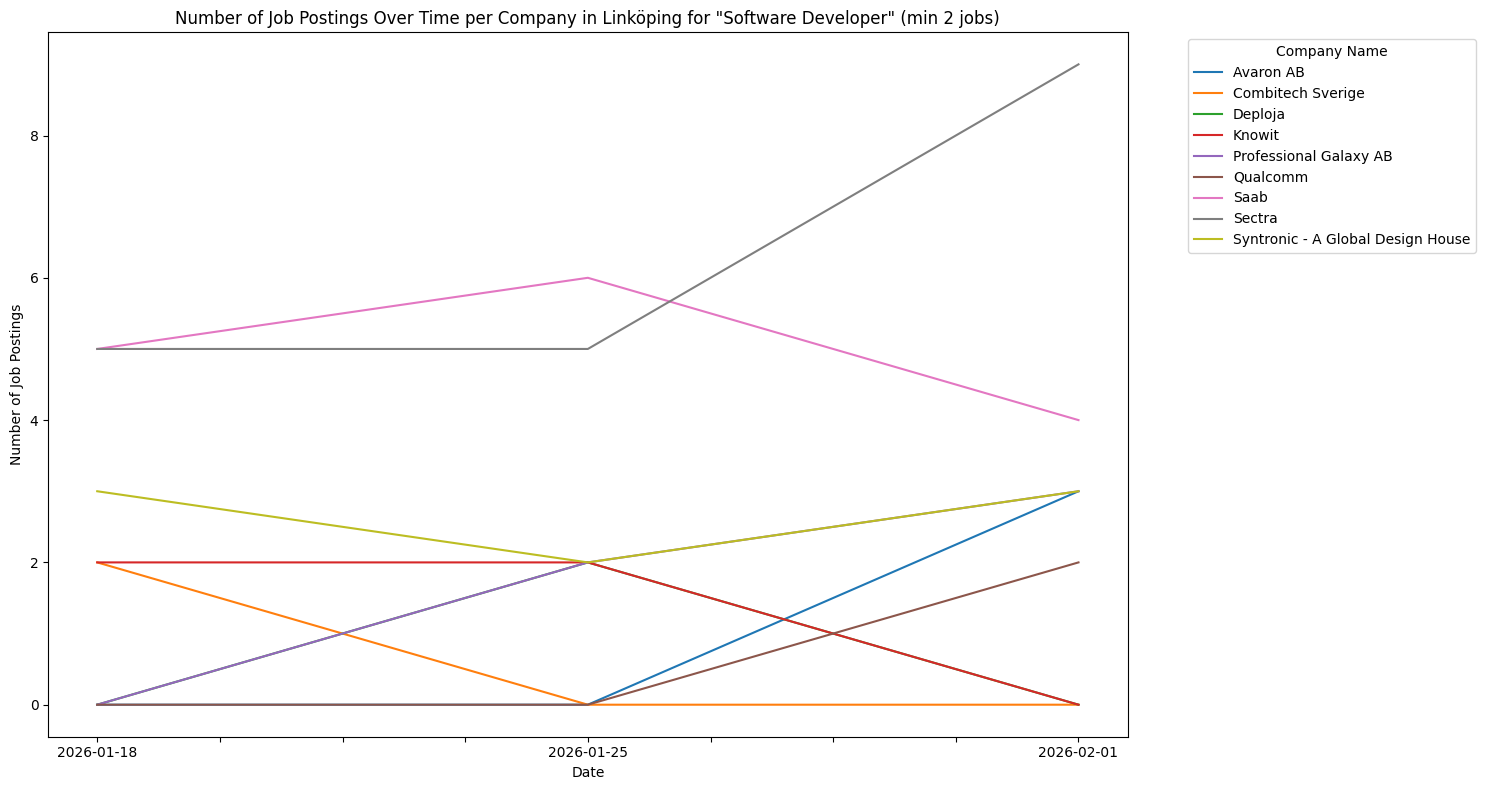

In [6]:
minimum_number_of_jobs = 2
jobs_over_time = pd.concat(all_jobs_dfs)
jobs_over_time_grouped = jobs_over_time.groupby(['date', 'company_name']).size().reset_index(name='job_count')
jobs_over_time_grouped = jobs_over_time_grouped[jobs_over_time_grouped['job_count'] >= minimum_number_of_jobs]
jobs_over_time_pivot = jobs_over_time_grouped.pivot(index='date', columns='company_name', values='job_count').fillna(0)
jobs_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Job Postings Over Time per Company in {place} for "{job_title}" (min {minimum_number_of_jobs} jobs)')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
jobs_over_time.company_name.unique()

array(['Qvantum Sverige', 'Professional Galaxy AB', 'Sectra', 'Avaron AB',
       'Formulate IT', 'Combine', 'Voyado', 'Väderstad AB', 'Knowit',
       'Qualcomm', 'Polar Light Technologies', 'Axis Communications',
       'Prevas AB', 'CGI', 'Experis Sweden', 'SICK Sensor Intelligence',
       'Saab', 'ALTEN Sweden', 'Syntronic - A Global Design House',
       'Combitech Sverige', 'Framtiden AB', 'HiQ', 'TMC Sweden',
       'Deploja', 'INUstyr AB', 'Skill', 'Elvis Eckardt Recruitment',
       'FOI', 'Ictech', 'Nexer Group', 'Together Tech'], dtype=object)

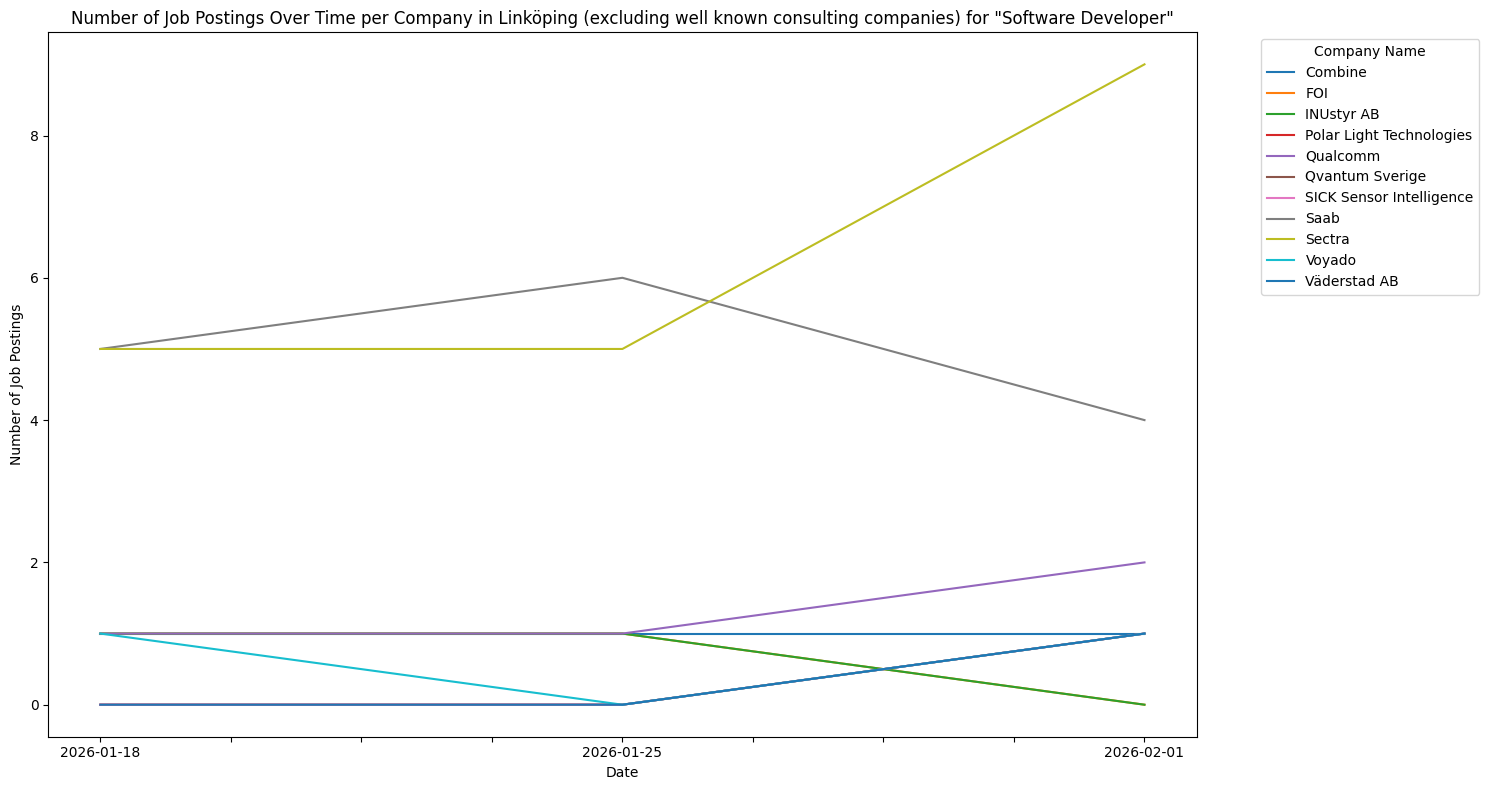

In [8]:
known_consulting_companies = ['Professional Galaxy AB', 'Avaron AB',
        'Formulate IT', 'Knowit','Axis Communications',
        'Prevas AB', 'CGI', 'Experis Sweden', 
        'ALTEN Sweden', 'Syntronic - A Global Design House',
        'Combitech Sverige', 'Framtiden AB', 'HiQ', 'TMC Sweden',
        'Deploja', 'Skill', 'Elvis Eckardt Recruitment',
        'Ictech', 'Nexer Group', 'Together Tech']

minimum_number_of_jobs = 1
jobs_over_time = pd.concat(all_jobs_dfs)
jobs_over_time_grouped = jobs_over_time.groupby(['date', 'company_name']).size().reset_index(name='job_count')
jobs_over_time_grouped = jobs_over_time_grouped[~jobs_over_time_grouped["company_name"].isin(known_consulting_companies)]
jobs_over_time_grouped = jobs_over_time_grouped[jobs_over_time_grouped['job_count'] >= minimum_number_of_jobs]
jobs_over_time_grouped = jobs_over_time_grouped.fillna(0)
jobs_over_time_pivot = jobs_over_time_grouped.pivot(index='date', columns='company_name', values='job_count').fillna(0)
jobs_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Job Postings Over Time per Company in {place} (excluding well known consulting companies) for "{job_title}"')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

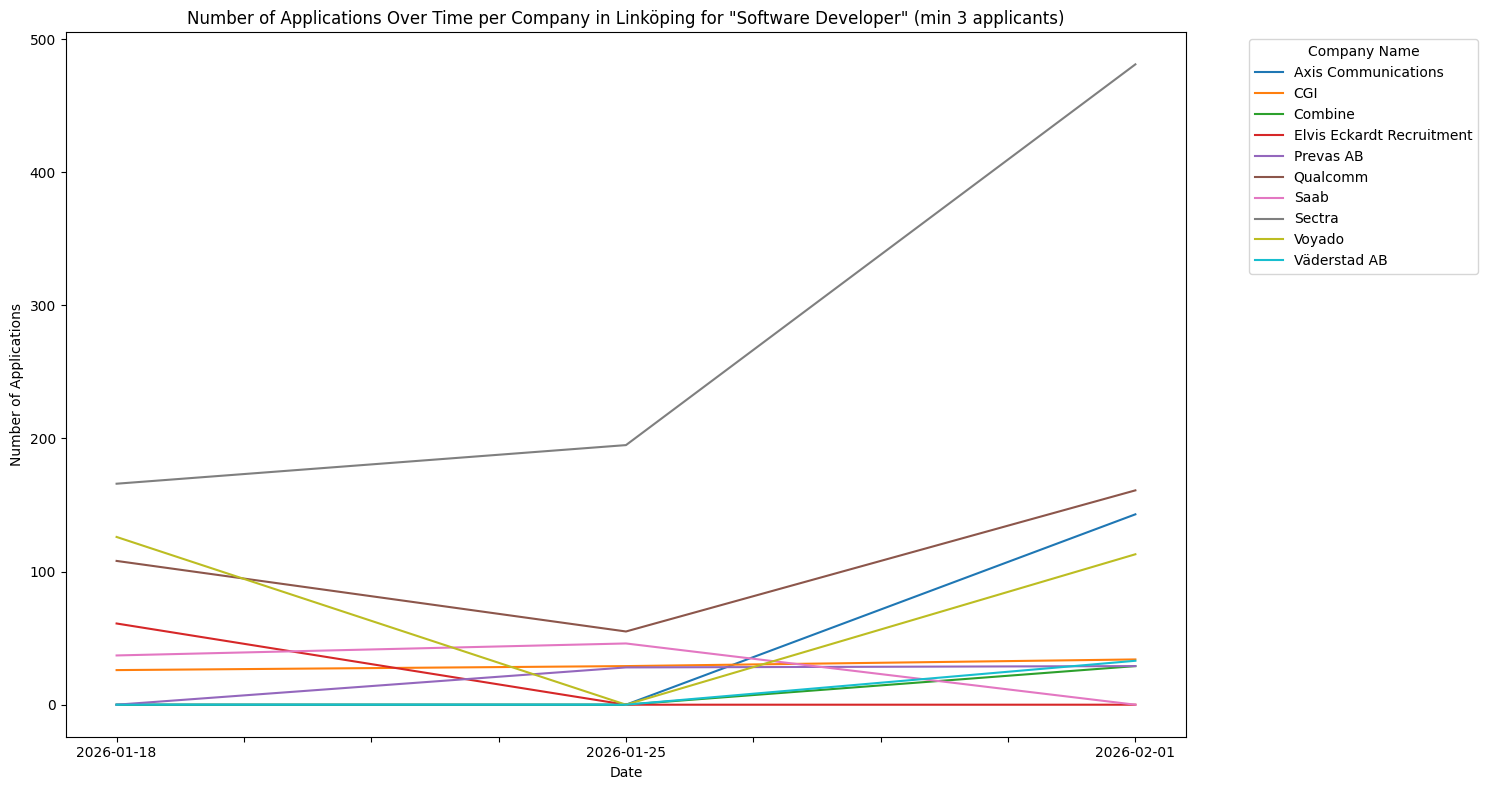

In [9]:
minimum_number_of_application = 3
applications_over_time = pd.concat(all_jobs_dfs)
applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time_grouped[applications_over_time_grouped['total_applications'] >= minimum_number_of_application]
applications_over_time_pivot = applications_over_time_grouped.pivot(index='date', columns='company_name', values='total_applications').fillna(0)
applications_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Applications Over Time per Company in {place} for "{job_title}" (min {minimum_number_of_application} applicants)')
plt.xlabel('Date')
plt.ylabel('Number of Applications')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 

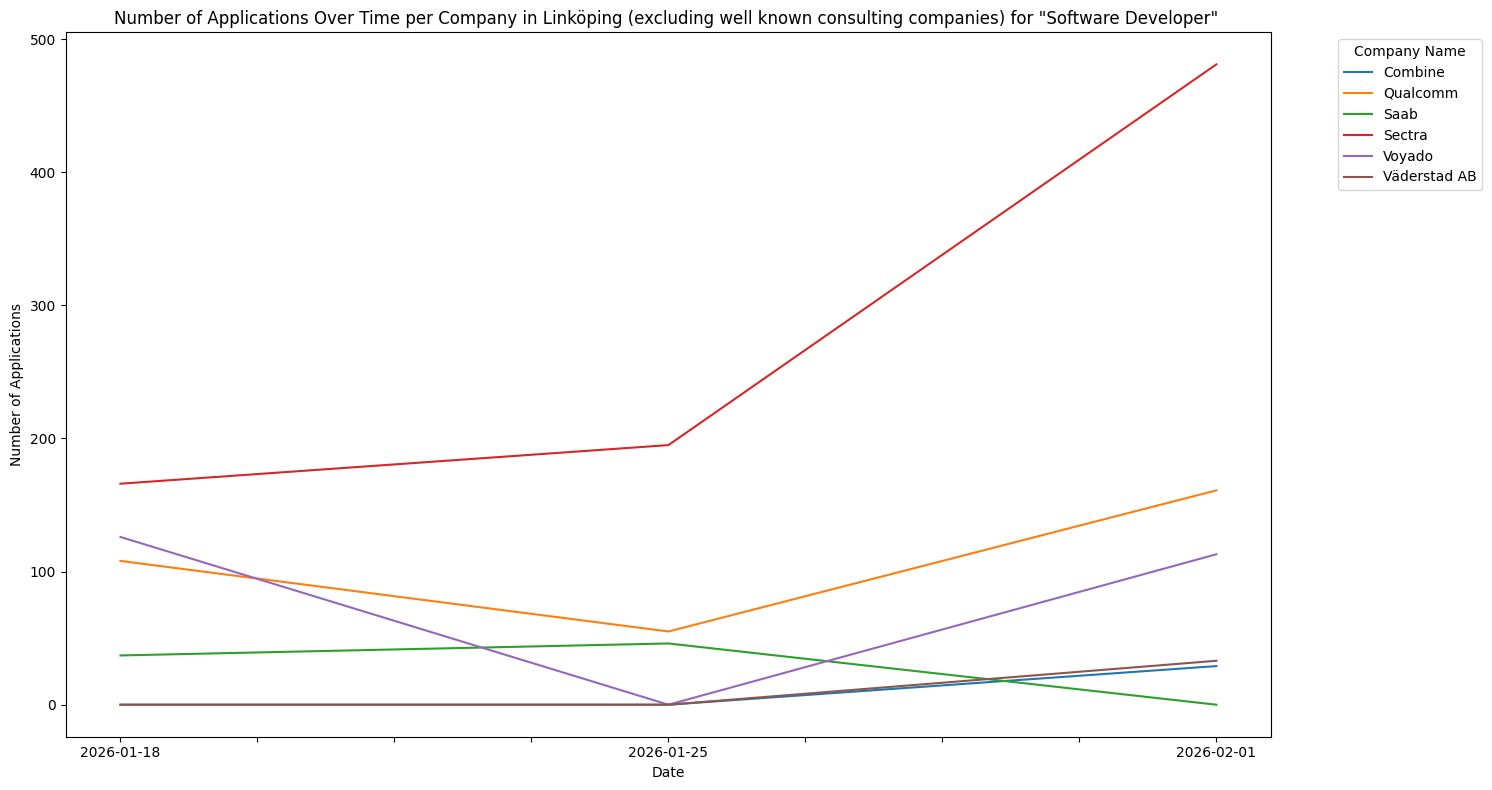

In [10]:
minimum_number_of_application = 1
applications_over_time = pd.concat(all_jobs_dfs)
applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time_grouped[~applications_over_time_grouped["company_name"].isin(known_consulting_companies)]
applications_over_time_grouped = applications_over_time_grouped[applications_over_time_grouped['total_applications'] >= minimum_number_of_application]
applications_over_time_pivot = applications_over_time_grouped.pivot(index='date', columns='company_name', values='total_applications').fillna(0)
applications_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Applications Over Time per Company in {place} (excluding well known consulting companies) for "{job_title}" ')
plt.xlabel('Date')
plt.ylabel('Number of Applications')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 